In [2]:
import numpy as np
from scipy.stats import chi2
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import norm
from scipy.optimize import minimize
from tqdm.notebook import tqdm
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
from sklearn.utils import resample

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Пункт А

In [3]:
arr = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
n = np.sum(arr)
values = np.array([i for i in range(10)])

In [4]:
def prefix_sum(x):
    for i in range(1, 10):
        x[i] += x[i-1]
    return x

y_uniform = values/9
y_prefix = prefix_sum(arr / 100)

delta~ = 1.4333333333333331
p-value = 0.03348


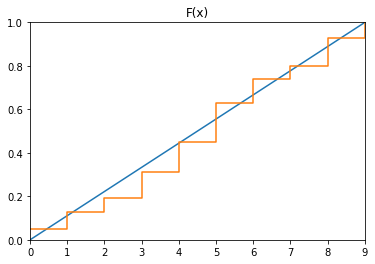

In [6]:
plt.axis([0, 9, 0, 1])
plt.title('F(x)')

plt.plot(values, y_uniform)
plt.step(values, y_prefix, where='post')
    
arr_delta1 = np.abs(y_uniform - y_prefix)
arr_delta2 = np.zeros_like(arr_delta1)
arr_delta2[1:] = abs(y_uniform[1:10] - y_prefix[0:9])
sup1 = max(arr_delta1)
sup2 = max(arr_delta2)
sup = max(sup1, sup2)
print("delta~ =", np.sqrt(n) * sup)

print("p-value = 0.03348")  # From Kolmogorov table

# Пункт Б

In [7]:
intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)]
counts = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]

In [8]:
data = []
for (start, end), count in zip(intervals, counts):
    midpoint = (start + end) / 2
    data.extend([midpoint] * count)

print(data)

[0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5]


In [9]:
initial_params = [np.mean(data), np.std(data)]

In [10]:
def likelihood(params):
    mu, sigma = params[0], params[1]
    if sigma <= 0:
        return np.inf
    return -np.sum(norm.logpdf(data, mu, sigma))

In [11]:
result = minimize(likelihood, initial_params, method='L-BFGS-B', bounds=[(-np.inf, np.inf), (0, np.inf)])

mu, sigma = result.x
print(f'Estimation of mu: {mu}')
print(f'Estimation of sigma: {sigma}')

Estimation of mu: 5.27
Estimation of sigma: 2.505414137423193


In [12]:
def f(x):
    global sigma, mu
    return norm.pdf(x, mu, sigma)

integral_intervals = [-np.inf, 1, 2, 3, 4, 5, 6, 7, 8, 9, np.inf]
p = np.array([integrate.quad(f, integral_intervals[i-1], integral_intervals[i])[0] for i in range(1, 11)])
print(f"Probabilities * n: {p}")

Probabilities * n: [0.04416168 0.05175522 0.08654102 0.1236538  0.1509787  0.15752502
 0.1404461  0.10700263 0.06966263 0.06827321]


In [13]:
delta = np.sum((counts - p * n) ** 2 / (p * n))
print("delta~ =", delta)

delta~ = 10.798973140500925


In [78]:
def f(x):
    return chi2.pdf(x, 7)

answer = integrate.quad(f, delta, np.inf)[0]
print(f"p-value = {answer}")

p-value = 0.8620594332422423


# Bootstrap

In [81]:
data = np.array(([0] * 5 + [1] * 8 + [2] * 6 + [3] * 12 + [4] * 14 + [5] * 18 + [6] * 11 + [7] * 6 + [8] * 13 + [9] * 7))
N = len(data)

In [82]:
# ~F(x) - emperical fuction
counts = np.array([np.count_nonzero(data == i) for i in range(10)])
probabilities = counts / counts.sum()
F_ = np.cumsum(probabilities)

In [83]:
values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
F = norm.cdf(values, mu, sigma)

In [84]:
arr_delta1 = np.abs(F_ - F)
arr_delta2 = np.zeros_like(arr_delta1)
arr_delta2[1:] = abs(F_[1:10] - F[0:9])
sup1 = max(arr_delta1)
sup2 = max(arr_delta2)
sup = max(sup1, sup2)

delta = np.sqrt(n) * sup
print("Delta =", np.sqrt(n) * sup)

Delta = 3.2388828767538627


In [90]:
# Bootstrap
B = 100000  # Number of bootstrap samples
bootstrap_arr = []
N_ = len(data)
for _ in range(B):
    sample = resample(data, replace = True)
    counts = np.array([np.count_nonzero(sample == i) for i in range(10)])
    probabilities = counts / counts.sum()
    F_ = np.cumsum(probabilities)
    arr_delta1 = np.abs(F_ - F)
    arr_delta2 = np.zeros_like(arr_delta1)
    arr_delta2[1:] = abs(F_[1:10] - F[0:9])
    sup1 = max(arr_delta1)
    sup2 = max(arr_delta2)
    sup = max(sup1, sup2)
    bootstrap_arr.append(np.sqrt(n) * sup)
    
lenght = len([x for x in bootstrap_arr if x <= delta]) 
p_value = lenght / B
print(f"p-value = {p_value}")

p-value = 0.50282


In [91]:
# # Bootstrap
# B = 100000  # Number of bootstrap samples
# bootstrap_samples = np.random.choice(data, (B, n), replace=True)

# counts = np.array([np.count_nonzero(bootstrap_samples[:] == i, axis=1) for i in range(10)]).T
# probabilities = counts / n
# F_ = np.cumsum(probabilities, axis=1)

# print(F_.shape)
# # F = np.repeat(F, B, axis=1)
# print(F.shape)

# arr_delta1 = np.abs(F_ - F)
# arr_delta2 = np.zeros_like(arr_delta1)
# F_shifted = np.roll(F, shift=-1)
# print(F)
# print(F_shifted)
# print(F[1:])
# arr_delta2 = np.abs(F_ - F_shifted)
# sup1 = np.max(arr_delta1, axis=1)
# sup2 = np.max(arr_delta2, axis=1)
# print(sup1)
# sup = np.sqrt(n) * np.max(sup1, sup2)


# length = sum(sup[sup <= delta])
# p_value = length / B
# print(f"p-value = {p_value}")